In [261]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
wikipedia_link='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

# import k-means for clustering stage
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# Lokalization  sensors on the map

In [262]:
sensors = pd.read_csv('C:\\Users\Jakubina\Desktop\krakow air\sensor_locations.csv',   engine='python')
sensors.head()

,id,latitude,longitude,zone
0,3,50.057748,19.961375,NaN
1,140,50.057747,19.961374,old town
2,142,50.084816,19.878066,NaN
3,147,50.048924,19.962262,NaN
4,169,50.048699,20.101569,EN


In [263]:
address = 'KRAKOW, KR '

geolocator = Nominatim(user_agent="krakow_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Krakow are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Krakow are 50.0853144, 20.0675614259824.


In [264]:
map_krakow = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for id, lat, lng in zip(sensors['id'], sensors['latitude'], sensors['longitude']):
    label = '{}'.format(id )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_krakow)  
    
map_krakow

## Loading data for every month 2017

In [265]:
january= pd.read_csv('C:\\Users\Jakubina\Desktop\krakow air\january-2017.csv')
#february=pd.read_csv('C:\\Users\Jakubina\Desktop\krakow air\february-2017.csv')
march=pd.read_csv('C:\\Users\Jakubina\Desktop\krakow air\march-2017.csv')
#april=pd.read_csv('C:\\Users\Jakubina\Desktop\krakow air\april-2017.csv')
may=pd.read_csv('C:\\Users\Jakubina\Desktop\krakow air\may-2017.csv')
june=pd.read_csv('C:\\Users\Jakubina\Desktop\krakow air\june-2017.csv')
july = pd.read_csv('C:\\Users\Jakubina\Desktop\krakow air\july-2017.csv')
#august=pd.read_csv('C:\\Users\Jakubina\Desktop\krakow air\august-2017.csv')
september=pd.read_csv('C:\\Users\Jakubina\Desktop\krakow air\september-2017.csv')
october=pd.read_csv('C:\\Users\Jakubina\Desktop\krakow air\october-2017.csv')
november=pd.read_csv('C:\\Users\Jakubina\Desktop\krakow air\october-2017.csv')
december = pd.read_csv('C:\\Users\Jakubina\Desktop\krakow air\december-2017.csv')


# winter time

# DECEMBER 2017

In [266]:
december.head()

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,171_pm1,171_pm25,171_pm10,172_temperature,172_humidity,172_pressure,172_pm1,172_pm25,172_pm10,173_temperature,173_humidity,173_pressure,173_pm1,173_pm25,173_pm10,174_temperature,174_humidity,174_pressure,174_pm1,174_pm25,174_pm10,176_temperature,176_humidity,176_pressure,176_pm1,176_pm25,176_pm10,177_temperature,177_humidity,177_pressure,177_pm1,177_pm25,177_pm10,178_temperature,178_humidity,178_pressure,178_pm1,178_pm25,178_pm10,179_temperature,179_humidity,179_pressure,179_pm1,179_pm25,179_pm10,180_temperature,180_humidity,180_pressure,180_pm1,180_pm25,180_pm10,181_temperature,181_humidity,181_pressure,181_pm1,181_pm25,181_pm10,182_temperature,182_humidity,182_pressure,182_pm1,182_pm25,182_pm10,183_temperature,183_humidity,183_pressure,183_pm1,183_pm25,183_pm10,184_temperature,184_humidity,184_pressure,184_pm1,184_pm25,184_pm10,185_temperature,185_humidity,185_pressure,185_pm1,185_pm25,185_pm10,187_temperature,187_humidity,187_pressure,187_pm1,187_pm25,187_pm10,189_temperature,189_humidity,189_pressure,189_pm1,189_pm25,189_pm10,192_temperature,192_humidity,192_pressure,192_pm1,192_pm25,192_pm10,194_temperature,194_humidity,194_pressure,194_pm1,194_pm25,194_pm10,195_temperature,195_humidity,195_pressure,195_pm1,195_pm25,195_pm10,196_temperature,196_humidity,196_pressure,196_pm1,196_pm25,196_pm10,201_temperature,201_humidity,201_pressure,201_pm1,201_pm25,201_pm10,202_temperature,202_humidity,202_pressure,202_pm1,202_pm25,202_pm10,203_temperature,203_humidity,203_pressure,203_pm1,203_pm25,203_pm10,204_temperature,204_humidity,204_pressure,204_pm1,204_pm25,204_pm10,205_temperature,205_humidity,205_pressure,205_pm1,205_pm25,205_pm10,208_temperature,208_humidity,208_pressure,208_pm1,208_pm25,208_pm10,209_temperature,209_humidity,209_pressure,209_pm1,209_pm25,209_pm10,210_temperature,210_humidity,210_pressure,210_pm1,210_pm25,210_pm10,211_temperature,211_humidity,211_pressure,211_pm1,211_pm25,211_pm10,212_temperature,212_humidity,212_pressure,212_pm1,212_pm25,212_pm10,213_temperature,213_humidity,213_pressure,213_pm1,213_pm25,213_pm10,214_temperature,214_humidity,214_pressure,214_pm1,214_pm25,214_pm10,215_temperature,215_humidity,215_pressure,215_pm1,215_pm25,215_pm10,216_temperature,216_humidity,216_pressure,216_pm1,216_pm25,216_pm10,218_temperature,218_humidity,218_pressure,218_pm1,218_pm25,218_pm10,219_temperature,219_humidity,219_pressure,219_pm1,219_pm25,219_pm10,220_temperature,220_humidity,220_pressure,220_pm1,220_pm25,220_pm10,221_temperature,221_humidity,221_pressure,221_pm1,221_pm25,221_pm10,222_temperature,222_humidity,222_pressure,222_pm1,222_pm25,222_pm10,223_temperature,223_humidity,223_pressure,223_pm1,223_pm25,223_pm10,225_temperature,225_humidity,225_pressure,225_pm1,225_pm25,225_pm10,226_temperature,226_humidity,226_pressure,226_pm1,226_pm25,226_pm10,227_temperature,227_humidity,227_pressure,227_pm1,227_pm25,227_pm10,228_temperature,228_humidity,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-12-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0,96,100542,39,38,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.0,70.0,100479.0,25.0,23.0,40.0,0.0,72.0,100527.0,29.0,28.0,48.0,0,96,100531

In [267]:
december.rename(columns={'UTC time':'time'}, inplace=True)


### Drop Nan columns (no data from sensor)

In [268]:
december.drop(['3_temperature', '3_humidity', '3_pressure', '3_pm1','3_pm25', '3_pm10','142_temperature', '142_humidity', '142_pressure', '142_pm1','142_pm25', '142_pm10','147_temperature', '147_humidity', '147_pressure', '147_pm1','147_pm25', '147_pm10','172_temperature', '172_humidity', '172_pressure', '172_pm1','172_pm25', '172_pm10', '178_temperature', '178_humidity', '178_pressure', '178_pm1','178_pm25', '178_pm10', '187_temperature', '187_humidity', '187_pressure', '187_pm1','187_pm25', '187_pm10', '205_temperature', '205_humidity', '205_pressure', '205_pm1','205_pm25', '205_pm10','211_temperature', '211_humidity', '211_pressure', '211_pm1','211_pm25', '211_pm10','213_temperature', '213_humidity', '213_pressure', '213_pm1','213_pm25', '213_pm10', '227_temperature', '227_humidity', '227_pressure', '227_pm1','227_pm25', '227_pm10', '169_temperature'], axis=1, inplace=True)
december.head()

,time,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,171_pm1,171_pm25,171_pm10,173_temperature,173_humidity,173_pressure,173_pm1,173_pm25,173_pm10,174_temperature,174_humidity,174_pressure,174_pm1,174_pm25,174_pm10,176_temperature,176_humidity,176_pressure,176_pm1,176_pm25,176_pm10,177_temperature,177_humidity,177_pressure,177_pm1,177_pm25,177_pm10,179_temperature,179_humidity,179_pressure,179_pm1,179_pm25,179_pm10,180_temperature,180_humidity,180_pressure,180_pm1,180_pm25,180_pm10,181_temperature,181_humidity,181_pressure,181_pm1,181_pm25,181_pm10,182_temperature,182_humidity,182_pressure,182_pm1,182_pm25,182_pm10,183_temperature,183_humidity,183_pressure,183_pm1,183_pm25,183_pm10,184_temperature,184_humidity,184_pressure,184_pm1,184_pm25,184_pm10,185_temperature,185_humidity,185_pressure,185_pm1,185_pm25,185_pm10,189_temperature,189_humidity,189_pressure,189_pm1,189_pm25,189_pm10,192_temperature,192_humidity,192_pressure,192_pm1,192_pm25,192_pm10,194_temperature,194_humidity,194_pressure,194_pm1,194_pm25,194_pm10,195_temperature,195_humidity,195_pressure,195_pm1,195_pm25,195_pm10,196_temperature,196_humidity,196_pressure,196_pm1,196_pm25,196_pm10,201_temperature,201_humidity,201_pressure,201_pm1,201_pm25,201_pm10,202_temperature,202_humidity,202_pressure,202_pm1,202_pm25,202_pm10,203_temperature,203_humidity,203_pressure,203_pm1,203_pm25,203_pm10,204_temperature,204_humidity,204_pressure,204_pm1,204_pm25,204_pm10,208_temperature,208_humidity,208_pressure,208_pm1,208_pm25,208_pm10,209_temperature,209_humidity,209_pressure,209_pm1,209_pm25,209_pm10,210_temperature,210_humidity,210_pressure,210_pm1,210_pm25,210_pm10,212_temperature,212_humidity,212_pressure,212_pm1,212_pm25,212_pm10,214_temperature,214_humidity,214_pressure,214_pm1,214_pm25,214_pm10,215_temperature,215_humidity,215_pressure,215_pm1,215_pm25,215_pm10,216_temperature,216_humidity,216_pressure,216_pm1,216_pm25,216_pm10,218_temperature,218_humidity,218_pressure,218_pm1,218_pm25,218_pm10,219_temperature,219_humidity,219_pressure,219_pm1,219_pm25,219_pm10,220_temperature,220_humidity,220_pressure,220_pm1,220_pm25,220_pm10,221_temperature,221_humidity,221_pressure,221_pm1,221_pm25,221_pm10,222_temperature,222_humidity,222_pressure,222_pm1,222_pm25,222_pm10,223_temperature,223_humidity,223_pressure,223_pm1,223_pm25,223_pm10,225_temperature,225_humidity,225_pressure,225_pm1,225_pm25,225_pm10,226_temperature,226_humidity,226_pressure,226_pm1,226_pm25,226_pm10,228_temperature,228_humidity,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-12-01T00:00:00,0,96,100542,39,38,68,70.0,100479.0,25.0,23.0,40.0,0.0,72.0,100527.0,29.0,28.0,48.0,0,96,100531,32,30,52,0,97,100536,29,29,47,0.0,97.0,100495.0,32.0,30.0,51.0,0,96,100602,28,26,51,0.0,97.0,100540.0,34.0,33.0,55.0,0.0,96.0,100635.0,34.0,34.0,56.0,0,97,100679,25,22,37,0,97,100597,30,29,50,0,95,100568,28,26,43,0.0,96.0,100569.0,28.0,28.0,46.0,0,97,100548,29,26,44,0.0,97.0,100568.0,34.0,32.0,55.0,0.0,97.0,100598.0,28.0,26.0,42.0,0,96,100538,34,33,56,1.0,-2442.0,100399.0,30.0,29.0,50.0,0.0,90.0,100638.0,32.0,32.0,53.0,0.0,97.0,100659.0,27.0,26.0,42.0,1,97,100630,31,29,50,0,97,100772,30,27,42,0.0,97.0,NaN,31.0,29.0,49.0,1.0,97.0,100571.0,31.0,31.0,53.0,0,92,100564,31,30,52,0.0,96.0,100373.0,29.0,28.0,47.0,1,97,100537,27,25,41,0,85,100448,27,26,43,0.0,97.0,100629.0,36.0,36.0,62.0,0.0,96.0,100583.0,27.0,26.0,43.0,0.0,91.0,100683.0,31.0,29.0,49.0,0,97,100720

In [269]:
december.set_index('time', inplace=True)

In [270]:
december=december.astype(float)

In [271]:
print(december.dtypes)

140_temperature    float64
140_humidity       float64
140_pressure       float64
140_pm1            float64
140_pm25           float64
140_pm10           float64
169_humidity       float64
169_pressure       float64
169_pm1            float64
169_pm25           float64
169_pm10           float64
170_temperature    float64
170_humidity       float64
170_pressure       float64
170_pm1            float64
170_pm25           float64
170_pm10           float64
171_temperature    float64
171_humidity       float64
171_pressure       float64
171_pm1            float64
171_pm25           float64
171_pm10           float64
173_temperature    float64
173_humidity       float64
173_pressure       float64
173_pm1            float64
173_pm25           float64
173_pm10           float64
174_temperature    float64
174_humidity       float64
174_pressure       float64
174_pm1            float64
174_pm25           float64
174_pm10           float64
176_temperature    float64
176_humidity       float64
1

### select data for every day morning (8 oclock) for all sensors with data

In [272]:
dec_morning = december.filter(like='T08:00:00', axis=0)
dec_pm25_morning = dec_morning.filter(regex='_pm25') 
dec_pm25_morning['Dec_morning_pm25']=dec_pm25_morning.mean(axis=1)
dec_pm10_morning = dec_morning.filter(regex='_pm10') 
dec_pm10_morning['Dec_morning_pm10']=dec_pm10_morning.mean(axis=1)
dec_temp_morning = dec_morning.filter(regex='_temperature')
dec_temp_morning['Dec_morning_temp']=dec_temp_morning.mean(axis=1)
dec_press_morning = dec_morning.filter(regex='_pressure') 
dec_press_morning['Dec_morning_pressure']=dec_press_morning.mean(axis=1)
dec1 = pd.concat([dec_pm25_morning, dec_pm10_morning, dec_temp_morning, dec_press_morning], axis=1)
dec_morning=dec1[['Dec_morning_pm25','Dec_morning_pm10', 'Dec_morning_temp', 'Dec_morning_pressure' ]]

dec_morning.head()


,Dec_morning_pm25,Dec_morning_pm10,Dec_morning_temp,Dec_morning_pressure
time,,,,
2017-12-01T08:00:00,31.622222,54.644444,0.840909,101190.545455
2017-12-02T08:00:00,83.717391,125.043478,-2.266667,102392.333333
2017-12-03T08:00:00,32.955556,57.088889,0.090909,102213.840909
2017-12-04T08:00:00,25.978261,44.217391,-0.177778,101734.688889
2017-12-05T08:00:00,21.413043,36.695652,0.488889,102550.733333


In [273]:
dec_morning.shape

(24, 4)

### select data for every day evening (18 oclock) for all sensors with data

In [274]:
dec_ev = december.filter(like='T18:00:00', axis=0)
dec_pm25_ev = dec_ev.filter(regex='_pm25') 
dec_pm25_ev['Dec_evening_pm25']=dec_pm25_ev.mean(axis=1)
dec_pm10_ev = dec_ev.filter(regex='_pm10') 
dec_pm10_ev['Dec_evening_pm10']=dec_pm10_ev.mean(axis=1)
dec_temp_ev = dec_ev.filter(regex='_temperature')
dec_temp_ev['Dec_evening_temp']=dec_temp_ev.mean(axis=1)
dec_press_ev = dec_ev.filter(regex='_pressure') 
dec_press_ev['Dec_evening_pressure']=dec_press_ev.mean(axis=1)
dec2 = pd.concat([dec_pm25_ev, dec_pm10_ev, dec_temp_ev, dec_press_ev], axis=1)
dec_ev=dec2[['Dec_evening_pm25','Dec_evening_pm10', 'Dec_evening_temp', 'Dec_evening_pressure']]
dec_ev.head()



,Dec_evening_pm25,Dec_evening_pm10,Dec_evening_temp,Dec_evening_pressure
time,,,,
2017-12-01T18:00:00,79.086957,114.978261,-1.911111,101775.200000
2017-12-02T18:00:00,72.934783,108.065217,-0.933333,102504.177778
2017-12-03T18:00:00,39.065217,66.043478,0.977778,102000.333333
2017-12-04T18:00:00,38.847826,66.086957,0.311111,101956.444444
2017-12-05T18:00:00,32.777778,56.311111,1.704545,102335.840909


In [275]:
dec_morning.reset_index(drop=True, inplace=True)
dec_ev.reset_index(drop=True, inplace=True)


### getting morning and evening data together

In [276]:
dec=pd.concat([dec_morning, dec_ev], axis=1)
dec

,Dec_morning_pm25,Dec_morning_pm10,Dec_morning_temp,Dec_morning_pressure,Dec_evening_pm25,Dec_evening_pm10,Dec_evening_temp,Dec_evening_pressure
0,31.622222,54.644444,0.840909,101190.545455,79.086957,114.978261,-1.911111,101775.200000
1,83.717391,125.043478,-2.266667,102392.333333,72.934783,108.065217,-0.933333,102504.177778
2,32.955556,57.088889,0.090909,102213.840909,39.065217,66.043478,0.977778,102000.333333
3,25.978261,44.217391,-0.177778,101734.688889,38.847826,66.086957,0.311111,101956.444444
4,21.413043,36.695652,0.488889,102550.733333,32.777778,56.311111,1.704545,102335.840909
5,19.863636,34.045455,3.069767,102374.651163,32.108696,55.717391,2.066667,102347.600000
6,18.866667,31.866667,3.159091,102259.454545,66.200000,99.311111,0.886364,101603.909091
7,22.565217,37.630435,5.288889,100833.377778,28.577778,49.200000,3.204545,100819.704545
8,29.866667,51.000000,0.613636,100819.431818,52.909091,85.272727,-0.325581,100840.232558
9,14.755556,24.977778,0.272727,100857.409091,9.681818,16.250000,0.325581,99588.860465


In [277]:
dec['Dec_pm_25_day']=dec[['Dec_morning_pm25', 'Dec_evening_pm25']].mean(axis=1)
dec['Dec_pm_10_day']=dec[['Dec_morning_pm10', 'Dec_evening_pm10']].mean(axis=1)
dec['Dec_temp_day']=dec[['Dec_morning_temp', 'Dec_evening_temp']].mean(axis=1)
dec['Dec_press_day']=dec[['Dec_morning_pressure', 'Dec_evening_pressure']].mean(axis=1)
dec.head()

,Dec_morning_pm25,Dec_morning_pm10,Dec_morning_temp,Dec_morning_pressure,Dec_evening_pm25,Dec_evening_pm10,Dec_evening_temp,Dec_evening_pressure,Dec_pm_25_day,Dec_pm_10_day,Dec_temp_day,Dec_press_day
0,31.622222,54.644444,0.840909,101190.545455,79.086957,114.978261,-1.911111,101775.200000,55.354589,84.811353,-0.535101,101482.872727
1,83.717391,125.043478,-2.266667,102392.333333,72.934783,108.065217,-0.933333,102504.177778,78.326087,116.554348,-1.600000,102448.255556
2,32.955556,57.088889,0.090909,102213.840909,39.065217,66.043478,0.977778,102000.333333,36.010386,61.566184,0.534343,102107.087121
3,25.978261,44.217391,-0.177778,101734.688889,38.847826,66.086957,0.311111,101956.444444,32.413043,55.152174,0.066667,101845.566667
4,21.413043,36.695652,0.488889,102550.733333,32.777778,56.311111,1.704545,102335.840909,27.095411,46.503382,1.096717,102443.287121


# January 2017

In [278]:
january.head()

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,171_pm1,171_pm25,171_pm10,172_temperature,172_humidity,172_pressure,172_pm1,172_pm25,172_pm10,173_temperature,173_humidity,173_pressure,173_pm1,173_pm25,173_pm10,174_temperature,174_humidity,174_pressure,174_pm1,174_pm25,174_pm10,176_temperature,176_humidity,176_pressure,176_pm1,176_pm25,176_pm10,177_temperature,177_humidity,177_pressure,177_pm1,177_pm25,177_pm10,178_temperature,178_humidity,178_pressure,178_pm1,178_pm25,178_pm10,179_temperature,179_humidity,179_pressure,179_pm1,179_pm25,179_pm10,180_temperature,180_humidity,180_pressure,180_pm1,180_pm25,180_pm10,181_temperature,181_humidity,181_pressure,181_pm1,181_pm25,181_pm10,182_temperature,182_humidity,182_pressure,182_pm1,182_pm25,182_pm10,183_temperature,183_humidity,183_pressure,183_pm1,183_pm25,183_pm10,184_temperature,184_humidity,184_pressure,184_pm1,184_pm25,184_pm10,185_temperature,185_humidity,185_pressure,185_pm1,185_pm25,185_pm10,187_temperature,187_humidity,187_pressure,187_pm1,187_pm25,187_pm10,189_temperature,189_humidity,189_pressure,189_pm1,189_pm25,189_pm10,192_temperature,192_humidity,192_pressure,192_pm1,192_pm25,192_pm10,194_temperature,194_humidity,194_pressure,194_pm1,194_pm25,194_pm10,195_temperature,195_humidity,195_pressure,195_pm1,195_pm25,195_pm10,196_temperature,196_humidity,196_pressure,196_pm1,196_pm25,196_pm10,201_temperature,201_humidity,201_pressure,201_pm1,201_pm25,201_pm10,202_temperature,202_humidity,202_pressure,202_pm1,202_pm25,202_pm10,203_temperature,203_humidity,203_pressure,203_pm1,203_pm25,203_pm10,204_temperature,204_humidity,204_pressure,204_pm1,204_pm25,204_pm10,205_temperature,205_humidity,205_pressure,205_pm1,205_pm25,205_pm10,208_temperature,208_humidity,208_pressure,208_pm1,208_pm25,208_pm10,209_temperature,209_humidity,209_pressure,209_pm1,209_pm25,209_pm10,210_temperature,210_humidity,210_pressure,210_pm1,210_pm25,210_pm10,211_temperature,211_humidity,211_pressure,211_pm1,211_pm25,211_pm10,212_temperature,212_humidity,212_pressure,212_pm1,212_pm25,212_pm10,213_temperature,213_humidity,213_pressure,213_pm1,213_pm25,213_pm10,214_temperature,214_humidity,214_pressure,214_pm1,214_pm25,214_pm10,215_temperature,215_humidity,215_pressure,215_pm1,215_pm25,215_pm10,216_temperature,216_humidity,216_pressure,216_pm1,216_pm25,216_pm10,218_temperature,218_humidity,218_pressure,218_pm1,218_pm25,218_pm10,219_temperature,219_humidity,219_pressure,219_pm1,219_pm25,219_pm10,220_temperature,220_humidity,220_pressure,220_pm1,220_pm25,220_pm10,221_temperature,221_humidity,221_pressure,221_pm1,221_pm25,221_pm10,222_temperature,222_humidity,222_pressure,222_pm1,222_pm25,222_pm10,223_temperature,223_humidity,223_pressure,223_pm1,223_pm25,223_pm10,225_temperature,225_humidity,225_pressure,225_pm1,225_pm25,225_pm10,226_temperature,226_humidity,226_pressure,226_pm1,226_pm25,226_pm10,227_temperature,227_humidity,227_pressure,227_pm1,227_pm25,227_pm10,228_temperature,228_humidity,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,68.0,102279.0,115.0,127.0,196.0,-3.0,57.0,102505.0,196.0,222.0,346.0,0.0,49.0,102689.0,124.0,145.0,229.0,2,25,102379,14

In [279]:
january.rename(columns={'UTC time':'time'}, inplace=True)

In [280]:
january.drop(['3_temperature', '3_humidity', '3_pressure', '3_pm1','3_pm25', '3_pm10','140_temperature', '140_humidity', '140_pressure', '140_pm1','140_pm25', '140_pm10','181_temperature', '181_humidity', '181_pressure', '181_pm1','181_pm25', '181_pm10','184_temperature', '184_humidity', '184_pressure', '184_pm1','184_pm25', '184_pm10', '185_temperature', '185_humidity', '185_pressure', '185_pm1','185_pm25', '185_pm10', '205_temperature', '205_humidity', '205_pressure', '205_pm1','205_pm25', '205_pm10','216_temperature', '216_humidity', '216_pressure', '216_pm1','216_pm25', '216_pm10','622_temperature', '622_humidity', '622_pressure', '622_pm1','622_pm25', '622_pm10', '713_temperature', '713_humidity', '713_pressure', '713_pm1','713_pm25', '713_pm10','808_temperature', '808_humidity', '808_pressure', '808_pm1','808_pm25', '808_pm10','857_temperature', '857_humidity', '857_pressure', '857_pm1','857_pm25', '857_pm10', '895_temperature', '895_humidity', '895_pressure', '895_pm1','895_pm25', '895_pm10'], axis=1, inplace=True)
january.head()

,time,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,171_pm1,171_pm25,171_pm10,172_temperature,172_humidity,172_pressure,172_pm1,172_pm25,172_pm10,173_temperature,173_humidity,173_pressure,173_pm1,173_pm25,173_pm10,174_temperature,174_humidity,174_pressure,174_pm1,174_pm25,174_pm10,176_temperature,176_humidity,176_pressure,176_pm1,176_pm25,176_pm10,177_temperature,177_humidity,177_pressure,177_pm1,177_pm25,177_pm10,178_temperature,178_humidity,178_pressure,178_pm1,178_pm25,178_pm10,179_temperature,179_humidity,179_pressure,179_pm1,179_pm25,179_pm10,180_temperature,180_humidity,180_pressure,180_pm1,180_pm25,180_pm10,182_temperature,182_humidity,182_pressure,182_pm1,182_pm25,182_pm10,183_temperature,183_humidity,183_pressure,183_pm1,183_pm25,183_pm10,187_temperature,187_humidity,187_pressure,187_pm1,187_pm25,187_pm10,189_temperature,189_humidity,189_pressure,189_pm1,189_pm25,189_pm10,192_temperature,192_humidity,192_pressure,192_pm1,192_pm25,192_pm10,194_temperature,194_humidity,194_pressure,194_pm1,194_pm25,194_pm10,195_temperature,195_humidity,195_pressure,195_pm1,195_pm25,195_pm10,196_temperature,196_humidity,196_pressure,196_pm1,196_pm25,196_pm10,201_temperature,201_humidity,201_pressure,201_pm1,201_pm25,201_pm10,202_temperature,202_humidity,202_pressure,202_pm1,202_pm25,202_pm10,203_temperature,203_humidity,203_pressure,203_pm1,203_pm25,203_pm10,204_temperature,204_humidity,204_pressure,204_pm1,204_pm25,204_pm10,208_temperature,208_humidity,208_pressure,208_pm1,208_pm25,208_pm10,209_temperature,209_humidity,209_pressure,209_pm1,209_pm25,209_pm10,210_temperature,210_humidity,210_pressure,210_pm1,210_pm25,210_pm10,211_temperature,211_humidity,211_pressure,211_pm1,211_pm25,211_pm10,212_temperature,212_humidity,212_pressure,212_pm1,212_pm25,212_pm10,213_temperature,213_humidity,213_pressure,213_pm1,213_pm25,213_pm10,214_temperature,214_humidity,214_pressure,214_pm1,214_pm25,214_pm10,215_temperature,215_humidity,215_pressure,215_pm1,215_pm25,215_pm10,218_temperature,218_humidity,218_pressure,218_pm1,218_pm25,218_pm10,219_temperature,219_humidity,219_pressure,219_pm1,219_pm25,219_pm10,220_temperature,220_humidity,220_pressure,220_pm1,220_pm25,220_pm10,221_temperature,221_humidity,221_pressure,221_pm1,221_pm25,221_pm10,222_temperature,222_humidity,222_pressure,222_pm1,222_pm25,222_pm10,223_temperature,223_humidity,223_pressure,223_pm1,223_pm25,223_pm10,225_temperature,225_humidity,225_pressure,225_pm1,225_pm25,225_pm10,226_temperature,226_humidity,226_pressure,226_pm1,226_pm25,226_pm10,227_temperature,227_humidity,227_pressure,227_pm1,227_pm25,227_pm10,228_temperature,228_humidity,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10
0,2017-01-01T00:00:00,-4.0,68.0,102279.0,115.0,127.0,196.0,-3.0,57.0,102505.0,196.0,222.0,346.0,0.0,49.0,102689.0,124.0,145.0,229.0,2,25,102379,148,176,277,1.0,27.0,102437.0,147.0,170.0,256.0,NaN,NaN,102527.0,123.0,144.0,219.0,NaN,NaN,102255,111,130,205,1.0,27.0,102499.0,117.0,132.0,212.0,1,54,NaN,140,165,254,2.0,50.0,NaN,99.0,115.0,183.0,0.0,52.0,NaN,176.0,208.0,335.0,0.0,55.0,NaN,92.0,107.0,169.0,1.0,53.0,NaN,129.0,140.0,215.0,0.0,54.0,NaN,125.0,145.0,227.0,1.0,48.0,NaN,77.0,89.0,146.0,3.0,46.0,102279.0,86.0,96.0,155.0,0.0,53.0,102606.0,119.0,138.0,213.0,0.0,24.0,102268.0,129.0,151.0,223.0,1.0,4.0,100155.0,46.0,49.0,90.0,0.0,35.0,102761.0,130.0,149.0,224.0,1.0,32.0,NaN,112.0,135.0,213.0,2.0,49.0,NaN,143.0,162.0,239.0,-3,67,102358,210,241,378,1.0,25.0,NaN,114.0,131.0,201.0,4.0,47.0,102359.0,120.0,140.0,220.0,1.0,27.0,102221.0,98.0,107.0,168.0,1,25,102159,93,107,165,2,26,102601,117,131,209,0.0,23.0,102711.0,147.0,179.0,275.0,0.0,29.0,101435.0,107.0,123.0,196.0,0.0,36.0,102460.0,136.0,154

In [281]:
january.set_index('time', inplace=True)

In [282]:
january=january.astype(float)
print(january.dtypes)

142_temperature    float64
142_humidity       float64
142_pressure       float64
142_pm1            float64
142_pm25           float64
142_pm10           float64
147_temperature    float64
147_humidity       float64
147_pressure       float64
147_pm1            float64
147_pm25           float64
147_pm10           float64
169_temperature    float64
169_humidity       float64
169_pressure       float64
169_pm1            float64
169_pm25           float64
169_pm10           float64
170_temperature    float64
170_humidity       float64
170_pressure       float64
170_pm1            float64
170_pm25           float64
170_pm10           float64
171_temperature    float64
171_humidity       float64
171_pressure       float64
171_pm1            float64
171_pm25           float64
171_pm10           float64
172_temperature    float64
172_humidity       float64
172_pressure       float64
172_pm1            float64
172_pm25           float64
172_pm10           float64
173_temperature    float64
1

In [283]:
jan_morning = january.filter(like='T08:00:00', axis=0)
jan_pm25_morning = jan_morning.filter(regex='_pm25') 
jan_pm25_morning['Jan_morning_pm25']=jan_pm25_morning.mean(axis=1)
jan_pm10_morning = jan_morning.filter(regex='_pm10') 
jan_pm10_morning['Jan_morning_pm10']=jan_pm10_morning.mean(axis=1)
jan_temp_morning = jan_morning.filter(regex='_temperature')
jan_temp_morning['Jan_morning_temp']=jan_temp_morning.mean(axis=1)
jan_press_morning = jan_morning.filter(regex='_pressure') 
jan_press_morning['Jan_morning_pressure']=jan_press_morning.mean(axis=1)
jan1 = pd.concat([jan_pm25_morning, jan_pm10_morning, jan_temp_morning, jan_press_morning], axis=1)
jan_morning=jan1[['Jan_morning_pm25','Jan_morning_pm10', 'Jan_morning_temp', 'Jan_morning_pressure' ]]

jan_morning.head()


,Jan_morning_pm25,Jan_morning_pm10,Jan_morning_temp,Jan_morning_pressure
time,,,,
2017-01-01T08:00:00,114.181818,180.545455,2.651163,101951.176471
2017-01-02T08:00:00,45.363636,81.613636,3.046512,101147.088235
2017-01-03T08:00:00,39.318182,72.977273,2.558140,101571.705882
2017-01-04T08:00:00,2.000000,10.279070,2.682927,99767.181818
2017-01-05T08:00:00,3.953488,13.930233,-1.238095,101035.121212


In [284]:
jan_ev = january.filter(like='T18:00:00', axis=0)
jan_pm25_ev = jan_ev.filter(regex='_pm25') 
jan_pm25_ev['Jan_evening_pm25']=jan_pm25_ev.mean(axis=1)
jan_pm10_ev = jan_ev.filter(regex='_pm10') 
jan_pm10_ev['Jan_evening_pm10']=jan_pm10_ev.mean(axis=1)
jan_temp_ev = jan_ev.filter(regex='_temperature')
jan_temp_ev['Jan_evening_temp']=jan_temp_ev.mean(axis=1)
jan_press_ev = jan_ev.filter(regex='_pressure') 
jan_press_ev['Jan_evening_pressure']=jan_press_ev.mean(axis=1)
jan2 = pd.concat([jan_pm25_ev, jan_pm10_ev, jan_temp_ev, jan_press_ev], axis=1)
jan_ev=jan2[['Jan_evening_pm25','Jan_evening_pm10', 'Jan_evening_temp', 'Jan_evening_pressure']]

jan_ev.head()

,Jan_evening_pm25,Jan_evening_pm10,Jan_evening_temp,Jan_evening_pressure
time,,,,
2017-01-01T18:00:00,142.659091,221.750000,1.069767,101523.588235
2017-01-02T18:00:00,49.136364,91.272727,1.857143,101261.470588
2017-01-03T18:00:00,19.250000,36.772727,2.023256,101097.205882
2017-01-04T18:00:00,8.511628,20.465116,1.404762,99520.090909
2017-01-05T18:00:00,20.930233,40.302326,-2.523810,102208.424242


In [285]:
jan_morning.reset_index(drop=True, inplace=True)
jan_ev.reset_index(drop=True, inplace=True)


In [286]:
jan=pd.concat([jan_morning, jan_ev], axis=1)
jan.head()

,Jan_morning_pm25,Jan_morning_pm10,Jan_morning_temp,Jan_morning_pressure,Jan_evening_pm25,Jan_evening_pm10,Jan_evening_temp,Jan_evening_pressure
0,114.181818,180.545455,2.651163,101951.176471,142.659091,221.750000,1.069767,101523.588235
1,45.363636,81.613636,3.046512,101147.088235,49.136364,91.272727,1.857143,101261.470588
2,39.318182,72.977273,2.558140,101571.705882,19.250000,36.772727,2.023256,101097.205882
3,2.000000,10.279070,2.682927,99767.181818,8.511628,20.465116,1.404762,99520.090909
4,3.953488,13.930233,-1.238095,101035.121212,20.930233,40.302326,-2.523810,102208.424242


In [287]:
jan['Jan_pm_25_day']=jan[['Jan_morning_pm25', 'Jan_evening_pm25']].mean(axis=1)
jan['Jan_pm_10_day']=jan[['Jan_morning_pm10', 'Jan_evening_pm10']].mean(axis=1)
jan['Jan_temp_day']=jan[['Jan_morning_temp', 'Jan_evening_temp']].mean(axis=1)
jan['Jan_press_day']=jan[['Jan_morning_pressure', 'Jan_evening_pressure']].mean(axis=1)
jan.head()

,Jan_morning_pm25,Jan_morning_pm10,Jan_morning_temp,Jan_morning_pressure,Jan_evening_pm25,Jan_evening_pm10,Jan_evening_temp,Jan_evening_pressure,Jan_pm_25_day,Jan_pm_10_day,Jan_temp_day,Jan_press_day
0,114.181818,180.545455,2.651163,101951.176471,142.659091,221.750000,1.069767,101523.588235,128.420455,201.147727,1.860465,101737.382353
1,45.363636,81.613636,3.046512,101147.088235,49.136364,91.272727,1.857143,101261.470588,47.250000,86.443182,2.451827,101204.279412
2,39.318182,72.977273,2.558140,101571.705882,19.250000,36.772727,2.023256,101097.205882,29.284091,54.875000,2.290698,101334.455882
3,2.000000,10.279070,2.682927,99767.181818,8.511628,20.465116,1.404762,99520.090909,5.255814,15.372093,2.043844,99643.636364
4,3.953488,13.930233,-1.238095,101035.121212,20.930233,40.302326,-2.523810,102208.424242,12.441860,27.116279,-1.880952,101621.772727


# Summer 

## June 2017

In [288]:
june.head(50)

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,171_pm1,171_pm25,171_pm10,172_temperature,172_humidity,172_pressure,172_pm1,172_pm25,172_pm10,173_temperature,173_humidity,173_pressure,173_pm1,173_pm25,173_pm10,174_temperature,174_humidity,174_pressure,174_pm1,174_pm25,174_pm10,176_temperature,176_humidity,176_pressure,176_pm1,176_pm25,176_pm10,177_temperature,177_humidity,177_pressure,177_pm1,177_pm25,177_pm10,178_temperature,178_humidity,178_pressure,178_pm1,178_pm25,178_pm10,179_temperature,179_humidity,179_pressure,179_pm1,179_pm25,179_pm10,180_temperature,180_humidity,180_pressure,180_pm1,180_pm25,180_pm10,181_temperature,181_humidity,181_pressure,181_pm1,181_pm25,181_pm10,182_temperature,182_humidity,182_pressure,182_pm1,182_pm25,182_pm10,183_temperature,183_humidity,183_pressure,183_pm1,183_pm25,183_pm10,184_temperature,184_humidity,184_pressure,184_pm1,184_pm25,184_pm10,185_temperature,185_humidity,185_pressure,185_pm1,185_pm25,185_pm10,187_temperature,187_humidity,187_pressure,187_pm1,187_pm25,187_pm10,189_temperature,189_humidity,189_pressure,189_pm1,189_pm25,189_pm10,192_temperature,192_humidity,192_pressure,192_pm1,192_pm25,192_pm10,194_temperature,194_humidity,194_pressure,194_pm1,194_pm25,194_pm10,195_temperature,195_humidity,195_pressure,195_pm1,195_pm25,195_pm10,196_temperature,196_humidity,196_pressure,196_pm1,196_pm25,196_pm10,201_temperature,201_humidity,201_pressure,201_pm1,201_pm25,201_pm10,202_temperature,202_humidity,202_pressure,202_pm1,202_pm25,202_pm10,203_temperature,203_humidity,203_pressure,203_pm1,203_pm25,203_pm10,204_temperature,204_humidity,204_pressure,204_pm1,204_pm25,204_pm10,205_temperature,205_humidity,205_pressure,205_pm1,205_pm25,205_pm10,208_temperature,208_humidity,208_pressure,208_pm1,208_pm25,208_pm10,209_temperature,209_humidity,209_pressure,209_pm1,209_pm25,209_pm10,210_temperature,210_humidity,210_pressure,210_pm1,210_pm25,210_pm10,211_temperature,211_humidity,211_pressure,211_pm1,211_pm25,211_pm10,212_temperature,212_humidity,212_pressure,212_pm1,212_pm25,212_pm10,213_temperature,213_humidity,213_pressure,213_pm1,213_pm25,213_pm10,214_temperature,214_humidity,214_pressure,214_pm1,214_pm25,214_pm10,215_temperature,215_humidity,215_pressure,215_pm1,215_pm25,215_pm10,216_temperature,216_humidity,216_pressure,216_pm1,216_pm25,216_pm10,218_temperature,218_humidity,218_pressure,218_pm1,218_pm25,218_pm10,219_temperature,219_humidity,219_pressure,219_pm1,219_pm25,219_pm10,220_temperature,220_humidity,220_pressure,220_pm1,220_pm25,220_pm10,221_temperature,221_humidity,221_pressure,221_pm1,221_pm25,221_pm10,222_temperature,222_humidity,222_pressure,222_pm1,222_pm25,222_pm10,223_temperature,223_humidity,223_pressure,223_pm1,223_pm25,223_pm10,225_temperature,225_humidity,225_pressure,225_pm1,225_pm25,225_pm10,226_temperature,226_humidity,226_pressure,226_pm1,226_pm25,226_pm10,227_temperature,227_humidity,227_pressure,227_pm1,227_pm25,227_pm10,228_temperature,228_humidity,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-06-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,12.0,90.0,101855.0,26.0,22.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101782.0,24.0,20.0,33.0,10.0,82.0,101805.0,14.0,13.0,21.0,12.0,90.0,101819.0,18.0,

In [289]:
june.rename(columns={'UTC time':'time'}, inplace=True)

In [290]:

june.drop(['3_temperature', '3_humidity', '3_pressure', '3_pm1','3_pm25', '3_pm10','140_temperature', '142_humidity', '142_pressure', '142_pm1','142_pm25', '142_pm10','147_temperature', '147_humidity', '181_temperature', '181_humidity', '178_pressure', '178_pm1','178_pm25', '178_pm10','187_temperature', '187_humidity', '187_pressure', '187_pm1','187_pm25', '187_pm10', '205_temperature', '205_humidity', '205_pressure', '205_pm1','205_pm25', '205_pm10','211_temperature', '211_humidity', '211_pressure', '211_pm1','211_pm25', '211_pm10', '808_humidity', '808_pressure', '808_pm1','808_pm25', '808_pm10','857_temperature', '857_humidity', '857_pressure', '857_pm1','857_pm25', '857_pm10'], axis=1, inplace=True)
june.head()

,time,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,171_pm1,171_pm25,171_pm10,172_temperature,172_humidity,172_pressure,172_pm1,172_pm25,172_pm10,173_temperature,173_humidity,173_pressure,173_pm1,173_pm25,173_pm10,174_temperature,174_humidity,174_pressure,174_pm1,174_pm25,174_pm10,176_temperature,176_humidity,176_pressure,176_pm1,176_pm25,176_pm10,177_temperature,177_humidity,177_pressure,177_pm1,177_pm25,177_pm10,178_temperature,178_humidity,179_temperature,179_humidity,179_pressure,179_pm1,179_pm25,179_pm10,180_temperature,180_humidity,180_pressure,180_pm1,180_pm25,180_pm10,181_pressure,181_pm1,181_pm25,181_pm10,182_temperature,182_humidity,182_pressure,182_pm1,182_pm25,182_pm10,183_temperature,183_humidity,183_pressure,183_pm1,183_pm25,183_pm10,184_temperature,184_humidity,184_pressure,184_pm1,184_pm25,184_pm10,185_temperature,185_humidity,185_pressure,185_pm1,185_pm25,185_pm10,189_temperature,189_humidity,189_pressure,189_pm1,189_pm25,189_pm10,192_temperature,192_humidity,192_pressure,192_pm1,192_pm25,192_pm10,194_temperature,194_humidity,194_pressure,194_pm1,194_pm25,194_pm10,195_temperature,195_humidity,195_pressure,195_pm1,195_pm25,195_pm10,196_temperature,196_humidity,196_pressure,196_pm1,196_pm25,196_pm10,201_temperature,201_humidity,201_pressure,201_pm1,201_pm25,201_pm10,202_temperature,202_humidity,202_pressure,202_pm1,202_pm25,202_pm10,203_temperature,203_humidity,203_pressure,203_pm1,203_pm25,203_pm10,204_temperature,204_humidity,204_pressure,204_pm1,204_pm25,204_pm10,208_temperature,208_humidity,208_pressure,208_pm1,208_pm25,208_pm10,209_temperature,209_humidity,209_pressure,209_pm1,209_pm25,209_pm10,210_temperature,210_humidity,210_pressure,210_pm1,210_pm25,210_pm10,212_temperature,212_humidity,212_pressure,212_pm1,212_pm25,212_pm10,213_temperature,213_humidity,213_pressure,213_pm1,213_pm25,213_pm10,214_temperature,214_humidity,214_pressure,214_pm1,214_pm25,214_pm10,215_temperature,215_humidity,215_pressure,215_pm1,215_pm25,215_pm10,216_temperature,216_humidity,216_pressure,216_pm1,216_pm25,216_pm10,218_temperature,218_humidity,218_pressure,218_pm1,218_pm25,218_pm10,219_temperature,219_humidity,219_pressure,219_pm1,219_pm25,219_pm10,220_temperature,220_humidity,220_pressure,220_pm1,220_pm25,220_pm10,221_temperature,221_humidity,221_pressure,221_pm1,221_pm25,221_pm10,222_temperature,222_humidity,222_pressure,222_pm1,222_pm25,222_pm10,223_temperature,223_humidity,223_pressure,223_pm1,223_pm25,223_pm10,225_temperature,225_humidity,225_pressure,225_pm1,225_pm25,225_pm10,226_temperature,226_humidity,226_pressure,226_pm1,226_pm25,226_pm10,227_temperature,227_humidity,227_pressure,227_pm1,227_pm25,227_pm10,228_temperature,228_humidity,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-06-01T00:00:00,90.0,101855.0,26.0,22.0,38.0,NaN,101782.0,24.0,20.0,33.0,10.0,82.0,101805.0,14.0,13.0,21.0,12.0,90.0,101819.0,18.0,15.0,25.0,11.0,90.0,101824.0,22.0,19.0,31.0,NaN,NaN,101820.0,20.0,17.0,28.0,11.0,90.0,101826.0,18.0,16.0,25.0,12.0,90.0,101766.0,20.0,17.0,28.0,12.0,90.0,NaN,21.0,18.0,34.0,12.0,90.0,101904.0,21.0,19.0,30.0,NaN,NaN,11.0,90.0,NaN,18.0,15.0,24.0,12.0,90.0,NaN,20.0,17.0,29.0,NaN,22.0,19.0,32.0,12.0,90.0,NaN,21.0,18.0,30.0,12.0,90.0,NaN,20.0,17.0,28.0,12.0,90.0,NaN,20.0,17.0,29.0,11.0,90.0,NaN,20.0,17.0,29.0,12.0,90.0,101921.0,17.0,15.0,24.0,11.0,90.0,101813.0,21.0,17.0,27.0,12.0,-2645.0,101712.0,20.0,19.0,30.0,11.0,90.0,101923.0,18.0,16.0,26.0,11.0,90.0,NaN,20.0,17.0,27.0,12.0,90.0,NaN,23.0,19.0,35.0,1

In [291]:
june.set_index('time', inplace=True)


In [292]:
june=june.astype(float)
print(june.dtypes)

140_humidity       float64
140_pressure       float64
140_pm1            float64
140_pm25           float64
140_pm10           float64
142_temperature    float64
147_pressure       float64
147_pm1            float64
147_pm25           float64
147_pm10           float64
169_temperature    float64
169_humidity       float64
169_pressure       float64
169_pm1            float64
169_pm25           float64
169_pm10           float64
170_temperature    float64
170_humidity       float64
170_pressure       float64
170_pm1            float64
170_pm25           float64
170_pm10           float64
171_temperature    float64
171_humidity       float64
171_pressure       float64
171_pm1            float64
171_pm25           float64
171_pm10           float64
172_temperature    float64
172_humidity       float64
172_pressure       float64
172_pm1            float64
172_pm25           float64
172_pm10           float64
173_temperature    float64
173_humidity       float64
173_pressure       float64
1

In [293]:
june_morning = june.filter(like='T08:00:00', axis=0)
june_pm25_morning = june_morning.filter(regex='_pm25') 
june_pm25_morning['June_morning_pm25']=june_pm25_morning.mean(axis=1)
june_pm10_morning = june_morning.filter(regex='_pm10') 
june_pm10_morning['June_morning_pm10']=june_pm10_morning.mean(axis=1)
june_temp_morning = june_morning.filter(regex='_temperature')
june_temp_morning['June_morning_temp']=june_temp_morning.mean(axis=1)
june_press_morning = june_morning.filter(regex='_pressure') 
june_press_morning['June_morning_pressure']=june_press_morning.mean(axis=1)
june1 = pd.concat([june_pm25_morning, june_pm10_morning, june_temp_morning, june_press_morning], axis=1)
june_morning=june1[['June_morning_pm25','June_morning_pm10', 'June_morning_temp', 'June_morning_pressure' ]]

june_morning.head()

,June_morning_pm25,June_morning_pm10,June_morning_temp,June_morning_pressure
time,,,,
2017-06-01T08:00:00,2.604167,4.708333,18.720930,101931.108108
2017-06-02T08:00:00,5.531915,9.340426,19.595238,101957.333333
2017-06-03T08:00:00,7.659574,12.765957,20.285714,101888.916667
2017-06-04T08:00:00,13.391304,21.782609,24.333333,101161.742857
2017-06-05T08:00:00,10.319149,16.851064,18.428571,101751.916667


In [294]:

june_ev = june.filter(like='T18:00:00', axis=0)
june_pm25_ev = june_ev.filter(regex='_pm25') 
june_pm25_ev['June_evening_pm25']=june_pm25_ev.mean(axis=1)
june_pm10_ev = june_ev.filter(regex='_pm10') 
june_pm10_ev['June_evening_pm10']=june_pm10_ev.mean(axis=1)
june_temp_ev = june_ev.filter(regex='_temperature')
june_temp_ev['June_evening_temp']=june_temp_ev.mean(axis=1)
june_press_ev = june_ev.filter(regex='_pressure') 
june_press_ev['June_evening_pressure']=june_press_ev.mean(axis=1)
june2 = pd.concat([june_pm25_ev, june_pm10_ev, june_temp_ev, june_press_ev], axis=1)
june_ev=june2[['June_evening_pm25','June_evening_pm10', 'June_evening_temp', 'June_evening_pressure']]

june_ev.head()

,June_evening_pm25,June_evening_pm10,June_evening_temp,June_evening_pressure
time,,,,
2017-06-01T18:00:00,4.583333,7.750000,17.023256,101941.621622
2017-06-02T18:00:00,6.404255,10.787234,19.571429,101714.722222
2017-06-03T18:00:00,8.936170,14.893617,18.953488,101582.694444
2017-06-04T18:00:00,15.347826,25.347826,16.619048,101139.971429
2017-06-05T18:00:00,9.711111,15.955556,17.850000,101518.264706


In [295]:
june_morning.reset_index(drop=True, inplace=True)
june_ev.reset_index(drop=True, inplace=True)

In [296]:
june=pd.concat([june_morning, june_ev], axis=1)
june.head()

,June_morning_pm25,June_morning_pm10,June_morning_temp,June_morning_pressure,June_evening_pm25,June_evening_pm10,June_evening_temp,June_evening_pressure
0,2.604167,4.708333,18.720930,101931.108108,4.583333,7.750000,17.023256,101941.621622
1,5.531915,9.340426,19.595238,101957.333333,6.404255,10.787234,19.571429,101714.722222
2,7.659574,12.765957,20.285714,101888.916667,8.936170,14.893617,18.953488,101582.694444
3,13.391304,21.782609,24.333333,101161.742857,15.347826,25.347826,16.619048,101139.971429
4,10.319149,16.851064,18.428571,101751.916667,9.711111,15.955556,17.850000,101518.264706


In [297]:
june['June_pm_25_day']=june[['June_morning_pm25', 'June_evening_pm25']].mean(axis=1)
june['June_pm_10_day']=june[['June_morning_pm10', 'June_evening_pm10']].mean(axis=1)
june['June_temp_day']=june[['June_morning_temp', 'June_evening_temp']].mean(axis=1)
june['June_press_day']=june[['June_morning_pressure', 'June_evening_pressure']].mean(axis=1)
june.head()

,June_morning_pm25,June_morning_pm10,June_morning_temp,June_morning_pressure,June_evening_pm25,June_evening_pm10,June_evening_temp,June_evening_pressure,June_pm_25_day,June_pm_10_day,June_temp_day,June_press_day
0,2.604167,4.708333,18.720930,101931.108108,4.583333,7.750000,17.023256,101941.621622,3.593750,6.229167,17.872093,101936.364865
1,5.531915,9.340426,19.595238,101957.333333,6.404255,10.787234,19.571429,101714.722222,5.968085,10.063830,19.583333,101836.027778
2,7.659574,12.765957,20.285714,101888.916667,8.936170,14.893617,18.953488,101582.694444,8.297872,13.829787,19.619601,101735.805556
3,13.391304,21.782609,24.333333,101161.742857,15.347826,25.347826,16.619048,101139.971429,14.369565,23.565217,20.476190,101150.857143
4,10.319149,16.851064,18.428571,101751.916667,9.711111,15.955556,17.850000,101518.264706,10.015130,16.403310,18.139286,101635.090686


## July

In [298]:
july.head()

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,171_pm1,171_pm25,171_pm10,172_temperature,172_humidity,172_pressure,172_pm1,172_pm25,172_pm10,173_temperature,173_humidity,173_pressure,173_pm1,173_pm25,173_pm10,174_temperature,174_humidity,174_pressure,174_pm1,174_pm25,174_pm10,176_temperature,176_humidity,176_pressure,176_pm1,176_pm25,176_pm10,177_temperature,177_humidity,177_pressure,177_pm1,177_pm25,177_pm10,178_temperature,178_humidity,178_pressure,178_pm1,178_pm25,178_pm10,179_temperature,179_humidity,179_pressure,179_pm1,179_pm25,179_pm10,180_temperature,180_humidity,180_pressure,180_pm1,180_pm25,180_pm10,181_temperature,181_humidity,181_pressure,181_pm1,181_pm25,181_pm10,182_temperature,182_humidity,182_pressure,182_pm1,182_pm25,182_pm10,183_temperature,183_humidity,183_pressure,183_pm1,183_pm25,183_pm10,184_temperature,184_humidity,184_pressure,184_pm1,184_pm25,184_pm10,185_temperature,185_humidity,185_pressure,185_pm1,185_pm25,185_pm10,187_temperature,187_humidity,187_pressure,187_pm1,187_pm25,187_pm10,189_temperature,189_humidity,189_pressure,189_pm1,189_pm25,189_pm10,192_temperature,192_humidity,192_pressure,192_pm1,192_pm25,192_pm10,194_temperature,194_humidity,194_pressure,194_pm1,194_pm25,194_pm10,195_temperature,195_humidity,195_pressure,195_pm1,195_pm25,195_pm10,196_temperature,196_humidity,196_pressure,196_pm1,196_pm25,196_pm10,201_temperature,201_humidity,201_pressure,201_pm1,201_pm25,201_pm10,202_temperature,202_humidity,202_pressure,202_pm1,202_pm25,202_pm10,203_temperature,203_humidity,203_pressure,203_pm1,203_pm25,203_pm10,204_temperature,204_humidity,204_pressure,204_pm1,204_pm25,204_pm10,205_temperature,205_humidity,205_pressure,205_pm1,205_pm25,205_pm10,208_temperature,208_humidity,208_pressure,208_pm1,208_pm25,208_pm10,209_temperature,209_humidity,209_pressure,209_pm1,209_pm25,209_pm10,210_temperature,210_humidity,210_pressure,210_pm1,210_pm25,210_pm10,211_temperature,211_humidity,211_pressure,211_pm1,211_pm25,211_pm10,212_temperature,212_humidity,212_pressure,212_pm1,212_pm25,212_pm10,213_temperature,213_humidity,213_pressure,213_pm1,213_pm25,213_pm10,214_temperature,214_humidity,214_pressure,214_pm1,214_pm25,214_pm10,215_temperature,215_humidity,215_pressure,215_pm1,215_pm25,215_pm10,216_temperature,216_humidity,216_pressure,216_pm1,216_pm25,216_pm10,218_temperature,218_humidity,218_pressure,218_pm1,218_pm25,218_pm10,219_temperature,219_humidity,219_pressure,219_pm1,219_pm25,219_pm10,220_temperature,220_humidity,220_pressure,220_pm1,220_pm25,220_pm10,221_temperature,221_humidity,221_pressure,221_pm1,221_pm25,221_pm10,222_temperature,222_humidity,222_pressure,222_pm1,222_pm25,222_pm10,223_temperature,223_humidity,223_pressure,223_pm1,223_pm25,223_pm10,225_temperature,225_humidity,225_pressure,225_pm1,225_pm25,225_pm10,226_temperature,226_humidity,226_pressure,226_pm1,226_pm25,226_pm10,227_temperature,227_humidity,227_pressure,227_pm1,227_pm25,227_pm10,228_temperature,228_humidity,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-07-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,14.0,88.0,100825,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100755,2,2,3,15,85,100766,2.0,2,3,14,77,100780,1,1,2,14,88,100793,3,2,3,NaN,NaN,100782.0,2.0,

In [299]:
july.rename(columns={'UTC time':'time'}, inplace=True)

In [300]:
july.drop(['3_temperature', '3_humidity', '3_pressure', '3_pm1','3_pm25', '3_pm10', '142_humidity', '142_pressure', '142_pm1','142_pm25', '142_pm10','147_temperature', '147_humidity', '178_temperature', '178_humidity', '178_pressure', '178_pm1','178_pm25', '178_pm10','187_temperature', '187_humidity', '187_pressure', '187_pm1','187_pm25', '187_pm10', '201_temperature', '201_humidity', '201_pressure', '201_pm1','201_pm25', '201_pm10','205_temperature', '205_humidity', '205_pressure', '205_pm1','205_pm25', '205_pm10','216_temperature', '216_humidity', '216_pressure', '216_pm1','216_pm25', '216_pm10','227_temperature', '227_humidity', '227_pressure', '227_pm1','227_pm25', '227_pm10', '808_humidity', '808_pressure', '808_pm1','808_pm25', '808_pm10','857_temperature', '857_humidity', '857_pressure', '857_pm1','857_pm25', '857_pm10'], axis=1, inplace=True)
july.head()

,time,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,171_pm1,171_pm25,171_pm10,172_temperature,172_humidity,172_pressure,172_pm1,172_pm25,172_pm10,173_temperature,173_humidity,173_pressure,173_pm1,173_pm25,173_pm10,174_temperature,174_humidity,174_pressure,174_pm1,174_pm25,174_pm10,176_temperature,176_humidity,176_pressure,176_pm1,176_pm25,176_pm10,177_temperature,177_humidity,177_pressure,177_pm1,177_pm25,177_pm10,179_temperature,179_humidity,179_pressure,179_pm1,179_pm25,179_pm10,180_temperature,180_humidity,180_pressure,180_pm1,180_pm25,180_pm10,181_temperature,181_humidity,181_pressure,181_pm1,181_pm25,181_pm10,182_temperature,182_humidity,182_pressure,182_pm1,182_pm25,182_pm10,183_temperature,183_humidity,183_pressure,183_pm1,183_pm25,183_pm10,184_temperature,184_humidity,184_pressure,184_pm1,184_pm25,184_pm10,185_temperature,185_humidity,185_pressure,185_pm1,185_pm25,185_pm10,189_temperature,189_humidity,189_pressure,189_pm1,189_pm25,189_pm10,192_temperature,192_humidity,192_pressure,192_pm1,192_pm25,192_pm10,194_temperature,194_humidity,194_pressure,194_pm1,194_pm25,194_pm10,195_temperature,195_humidity,195_pressure,195_pm1,195_pm25,195_pm10,196_temperature,196_humidity,196_pressure,196_pm1,196_pm25,196_pm10,202_temperature,202_humidity,202_pressure,202_pm1,202_pm25,202_pm10,203_temperature,203_humidity,203_pressure,203_pm1,203_pm25,203_pm10,204_temperature,204_humidity,204_pressure,204_pm1,204_pm25,204_pm10,208_temperature,208_humidity,208_pressure,208_pm1,208_pm25,208_pm10,209_temperature,209_humidity,209_pressure,209_pm1,209_pm25,209_pm10,210_temperature,210_humidity,210_pressure,210_pm1,210_pm25,210_pm10,211_temperature,211_humidity,211_pressure,211_pm1,211_pm25,211_pm10,212_temperature,212_humidity,212_pressure,212_pm1,212_pm25,212_pm10,213_temperature,213_humidity,213_pressure,213_pm1,213_pm25,213_pm10,214_temperature,214_humidity,214_pressure,214_pm1,214_pm25,214_pm10,215_temperature,215_humidity,215_pressure,215_pm1,215_pm25,215_pm10,218_temperature,218_humidity,218_pressure,218_pm1,218_pm25,218_pm10,219_temperature,219_humidity,219_pressure,219_pm1,219_pm25,219_pm10,220_temperature,220_humidity,220_pressure,220_pm1,220_pm25,220_pm10,221_temperature,221_humidity,221_pressure,221_pm1,221_pm25,221_pm10,222_temperature,222_humidity,222_pressure,222_pm1,222_pm25,222_pm10,223_temperature,223_humidity,223_pressure,223_pm1,223_pm25,223_pm10,225_temperature,225_humidity,225_pressure,225_pm1,225_pm25,225_pm10,226_temperature,226_humidity,226_pressure,226_pm1,226_pm25,226_pm10,228_temperature,228_humidity,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-07-01T00:00:00,14.0,88.0,100825,2,2,3,NaN,100755,2,2,3,15,85,100766,2.0,2,3,14,77,100780,1,1,2,14,88,100793,3,2,3,NaN,NaN,100782.0,2.0,2.0,3.0,14.0,88.0,100801,1,1,2,14,87,100717,2,2,3,14,87,NaN,3,2,4,14.0,87.0,100859.0,3.0,3.0,4.0,14,87,NaN,2,2,3,14,88,NaN,2,2,3,14.0,87.0,NaN,3.0,2.0,4.0,14.0,86.0,NaN,3.0,3.0,5.0,14,88,NaN,2,2,3,14.0,88.0,NaN,1.0,1.0,2.0,14.0,87.0,NaN,3.0,2.0,4.0,15.0,88.0,100870.0,2.0,1.0,3.0,14.0,88.0,100783.0,2.0,1.0,2.0,15.0,-2466.0,100675.0,3.0,3.0,5.0,14.0,87.0,100865.0,2.0,1.0,2.0,14.0,88.0,NaN,2.0,2.0,3.0,13,88,101026,3,2,4,14.0,88.0,NaN,3.0,2.0,4.0,15,87,100852,5,4,7,14,86,100846,2,2,4,14,88,100689,3,3,5,14.0,87.0,100792.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,14,84,100753,3,2,4,14.0,88.0,100723.0,2.0,1.0,2.0,14,88,100893,3,2,4,14,86,100891,2,2,4,14.0,88.0,100996.0,2.0,1.0,2.0,14.0,86.0,100883.0,3.0,3.0,4.0,14,87,100761

In [301]:
july.set_index('time', inplace=True)


In [302]:
july=july.astype(float)
print(july.dtypes)

140_temperature    float64
140_humidity       float64
140_pressure       float64
140_pm1            float64
140_pm25           float64
140_pm10           float64
142_temperature    float64
147_pressure       float64
147_pm1            float64
147_pm25           float64
147_pm10           float64
169_temperature    float64
169_humidity       float64
169_pressure       float64
169_pm1            float64
169_pm25           float64
169_pm10           float64
170_temperature    float64
170_humidity       float64
170_pressure       float64
170_pm1            float64
170_pm25           float64
170_pm10           float64
171_temperature    float64
171_humidity       float64
171_pressure       float64
171_pm1            float64
171_pm25           float64
171_pm10           float64
172_temperature    float64
172_humidity       float64
172_pressure       float64
172_pm1            float64
172_pm25           float64
172_pm10           float64
173_temperature    float64
173_humidity       float64
1

In [303]:
july_morning = july.filter(like='T08:00:00', axis=0)
july_pm25_morning = july_morning.filter(regex='_pm25') 
july_pm25_morning['July_morning_pm25']=july_pm25_morning.mean(axis=1)
july_pm10_morning = july_morning.filter(regex='_pm10') 
july_pm10_morning['July_morning_pm10']=july_pm10_morning.mean(axis=1)
july_temp_morning = july_morning.filter(regex='_temperature')
july_temp_morning['July_morning_temp']=july_temp_morning.mean(axis=1)
july_press_morning = july_morning.filter(regex='_pressure') 
july_press_morning['July_morning_pressure']=july_press_morning.mean(axis=1)
july1 = pd.concat([july_pm25_morning, july_pm10_morning, july_temp_morning, july_press_morning], axis=1)
july_morning=july1[['July_morning_pm25','July_morning_pm10', 'July_morning_temp', 'July_morning_pressure' ]]

july_morning.head()

,July_morning_pm25,July_morning_pm10,July_morning_temp,July_morning_pressure
time,,,,
2017-07-01T08:00:00,7.355556,12.088889,16.069767,100844.171429
2017-07-02T08:00:00,2.500000,4.227273,15.829268,101232.257143
2017-07-03T08:00:00,2.863636,5.090909,18.341463,101903.028571
2017-07-04T08:00:00,6.272727,10.318182,18.785714,101852.114286
2017-07-05T08:00:00,7.860465,12.697674,21.292683,101975.857143


In [304]:
july_ev = july.filter(like='T18:00:00', axis=0)
july_pm25_ev = july_ev.filter(regex='_pm25') 
july_pm25_ev['July_evening_pm25']=july_pm25_ev.mean(axis=1)
july_pm10_ev = july_ev.filter(regex='_pm10') 
july_pm10_ev['July_evening_pm10']=july_pm10_ev.mean(axis=1)
july_temp_ev = july_ev.filter(regex='_temperature')
july_temp_ev['July_evening_temp']=july_temp_ev.mean(axis=1)
july_press_ev = july_ev.filter(regex='_pressure') 
july_press_ev['July_evening_pressure']=july_press_ev.mean(axis=1)
july2 = pd.concat([july_pm25_ev, july_pm10_ev, july_temp_ev, july_press_ev], axis=1)
july_ev=july2[['July_evening_pm25','July_evening_pm10', 'July_evening_temp', 'July_evening_pressure' ]]

july_ev.head()

,July_evening_pm25,July_evening_pm10,July_evening_temp,July_evening_pressure
time,,,,
2017-07-01T18:00:00,3.777778,6.488889,18.268293,101004.142857
2017-07-02T18:00:00,7.840909,12.750000,17.261905,101444.971429
2017-07-03T18:00:00,3.272727,5.613636,16.261905,102017.457143
2017-07-04T18:00:00,5.651163,9.348837,19.146341,101893.457143
2017-07-05T18:00:00,13.186047,21.348837,14.975000,101877.852941


In [305]:
july_morning.reset_index(drop=True, inplace=True)
july_ev.reset_index(drop=True, inplace=True)

In [306]:
july=pd.concat([july_morning, july_ev], axis=1)
july.head()

,July_morning_pm25,July_morning_pm10,July_morning_temp,July_morning_pressure,July_evening_pm25,July_evening_pm10,July_evening_temp,July_evening_pressure
0,7.355556,12.088889,16.069767,100844.171429,3.777778,6.488889,18.268293,101004.142857
1,2.500000,4.227273,15.829268,101232.257143,7.840909,12.750000,17.261905,101444.971429
2,2.863636,5.090909,18.341463,101903.028571,3.272727,5.613636,16.261905,102017.457143
3,6.272727,10.318182,18.785714,101852.114286,5.651163,9.348837,19.146341,101893.457143
4,7.860465,12.697674,21.292683,101975.857143,13.186047,21.348837,14.975000,101877.852941


In [307]:
july['July_pm_25_day']=july[['July_morning_pm25', 'July_evening_pm25']].mean(axis=1)
july['July_pm_10_day']=july[['July_morning_pm10', 'July_evening_pm10']].mean(axis=1)
july['July_temp_day']=july[['July_morning_temp', 'July_evening_temp']].mean(axis=1)
july['July_press_day']=july[['July_morning_pressure', 'July_evening_pressure']].mean(axis=1)
july.head()

,July_morning_pm25,July_morning_pm10,July_morning_temp,July_morning_pressure,July_evening_pm25,July_evening_pm10,July_evening_temp,July_evening_pressure,July_pm_25_day,July_pm_10_day,July_temp_day,July_press_day
0,7.355556,12.088889,16.069767,100844.171429,3.777778,6.488889,18.268293,101004.142857,5.566667,9.288889,17.169030,100924.157143
1,2.500000,4.227273,15.829268,101232.257143,7.840909,12.750000,17.261905,101444.971429,5.170455,8.488636,16.545587,101338.614286
2,2.863636,5.090909,18.341463,101903.028571,3.272727,5.613636,16.261905,102017.457143,3.068182,5.352273,17.301684,101960.242857
3,6.272727,10.318182,18.785714,101852.114286,5.651163,9.348837,19.146341,101893.457143,5.961945,9.833510,18.966028,101872.785714
4,7.860465,12.697674,21.292683,101975.857143,13.186047,21.348837,14.975000,101877.852941,10.523256,17.023256,18.133841,101926.855042


### Joining all data together and selecting data for pm10 and pm2.5 for 4 months

In [308]:
data=pd.concat([dec, jan, june, july], axis=1)
data.head()

,Dec_morning_pm25,Dec_morning_pm10,Dec_morning_temp,Dec_morning_pressure,Dec_evening_pm25,Dec_evening_pm10,Dec_evening_temp,Dec_evening_pressure,Dec_pm_25_day,Dec_pm_10_day,Dec_temp_day,Dec_press_day,Jan_morning_pm25,Jan_morning_pm10,Jan_morning_temp,Jan_morning_pressure,Jan_evening_pm25,Jan_evening_pm10,Jan_evening_temp,Jan_evening_pressure,Jan_pm_25_day,Jan_pm_10_day,Jan_temp_day,Jan_press_day,June_morning_pm25,June_morning_pm10,June_morning_temp,June_morning_pressure,June_evening_pm25,June_evening_pm10,June_evening_temp,June_evening_pressure,June_pm_25_day,June_pm_10_day,June_temp_day,June_press_day,July_morning_pm25,July_morning_pm10,July_morning_temp,July_morning_pressure,July_evening_pm25,July_evening_pm10,July_evening_temp,July_evening_pressure,July_pm_25_day,July_pm_10_day,July_temp_day,July_press_day
0,31.622222,54.644444,0.840909,101190.545455,79.086957,114.978261,-1.911111,101775.200000,55.354589,84.811353,-0.535101,101482.872727,114.181818,180.545455,2.651163,101951.176471,142.659091,221.750000,1.069767,101523.588235,128.420455,201.147727,1.860465,101737.382353,2.604167,4.708333,18.720930,101931.108108,4.583333,7.750000,17.023256,101941.621622,3.593750,6.229167,17.872093,101936.364865,7.355556,12.088889,16.069767,100844.171429,3.777778,6.488889,18.268293,101004.142857,5.566667,9.288889,17.169030,100924.157143
1,83.717391,125.043478,-2.266667,102392.333333,72.934783,108.065217,-0.933333,102504.177778,78.326087,116.554348,-1.600000,102448.255556,45.363636,81.613636,3.046512,101147.088235,49.136364,91.272727,1.857143,101261.470588,47.250000,86.443182,2.451827,101204.279412,5.531915,9.340426,19.595238,101957.333333,6.404255,10.787234,19.571429,101714.722222,5.968085,10.063830,19.583333,101836.027778,2.500000,4.227273,15.829268,101232.257143,7.840909,12.750000,17.261905,101444.971429,5.170455,8.488636,16.545587,101338.614286
2,32.955556,57.088889,0.090909,102213.840909,39.065217,66.043478,0.977778,102000.333333,36.010386,61.566184,0.534343,102107.087121,39.318182,72.977273,2.558140,101571.705882,19.250000,36.772727,2.023256,101097.205882,29.284091,54.875000,2.290698,101334.455882,7.659574,12.765957,20.285714,101888.916667,8.936170,14.893617,18.953488,101582.694444,8.297872,13.829787,19.619601,101735.805556,2.863636,5.090909,18.341463,101903.028571,3.272727,5.613636,16.261905,102017.457143,3.068182,5.352273,17.301684,101960.242857
3,25.978261,44.217391,-0.177778,101734.688889,38.847826,66.086957,0.311111,101956.444444,32.413043,55.152174,0.066667,101845.566667,2.000000,10.279070,2.682927,99767.181818,8.511628,20.465116,1.404762,99520.090909,5.255814,15.372093,2.043844,99643.636364,13.391304,21.782609,24.333333,101161.742857,15.347826,25.347826,16.619048,101139.971429,14.369565,23.565217,20.476190,101150.857143,6.272727,10.318182,18.785714,101852.114286,5.651163,9.348837,19.146341,101893.457143,5.961945,9.833510,18.966028,101872.785714
4,21.413043,36.695652,0.488889,102550.733333,32.777778,56.311111,1.704545,102335.840909,27.095411,46.503382,1.096717,102443.287121,3.953488,13.930233,-1.238095,101035.121212,20.930233,40.302326,-2.523810,102208.424242,12.441860,27.116279,-1.880952,101621.772727,10.319149,16.851064,18.428571,101751.916667,9.711111,15.955556,17.850000,101518.264706,10.015130,16.403310,18.139286,101635.090686,7.860465,12.697674,21.292683,101975.857143,13.186047,21.348837,14.975000,101877.852941,10.523256,17.023256,18.133841,101926.855042


In [309]:
pm10=data[['Dec_pm_10_day', 'Jan_pm_10_day', 'June_pm_10_day', 'July_pm_10_day']]
pm10

,Dec_pm_10_day,Jan_pm_10_day,June_pm_10_day,July_pm_10_day
0,84.811353,201.147727,6.229167,9.288889
1,116.554348,86.443182,10.063830,8.488636
2,61.566184,54.875000,13.829787,5.352273
3,55.152174,15.372093,23.565217,9.833510
4,46.503382,27.116279,16.403310,17.023256
5,44.881423,47.079545,28.004348,13.220930
6,65.588889,171.965381,5.882979,29.686047
7,43.415217,200.182076,7.542553,21.926829
8,68.136364,231.270764,12.315217,18.752215
9,20.613889,178.701274,24.586957,32.129329


# VISUALIZATION

## Data

In [310]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

s = dec.style.background_gradient(cmap=cm)
s

,Dec_morning_pm25,Dec_morning_pm10,Dec_morning_temp,Dec_morning_pressure,Dec_evening_pm25,Dec_evening_pm10,Dec_evening_temp,Dec_evening_pressure,Dec_pm_25_day,Dec_pm_10_day,Dec_temp_day,Dec_press_day
0,31.6222,54.6444,0.840909,101191,79.087,114.978,-1.91111,101775,55.3546,84.8114,-0.535101,101483
1,83.7174,125.043,-2.26667,102392,72.9348,108.065,-0.933333,102504,78.3261,116.554,-1.6,102448
2,32.9556,57.0889,0.0909091,102214,39.0652,66.0435,0.977778,102000,36.0104,61.5662,0.534343,102107
3,25.9783,44.2174,-0.177778,101735,38.8478,66.087,0.311111,101956,32.413,55.1522,0.0666667,101846
4,21.413,36.6957,0.488889,102551,32.7778,56.3111,1.70455,102336,27.0954,46.5034,1.09672,102443
5,19.8636,34.0455,3.06977,102375,32.1087,55.7174,2.06667,102348,25.9862,44.8814,2.56822,102361
6,18.8667,31.8667,3.15909,102259,66.2,99.3111,0.886364,101604,42.5333,65.5889,2.02273,101932
7,22.5652,37.6304,5.28889,100833,28.5778,49.2,3.20455,100820,25.5715,43.4152,4.24672,100827
8,29.8667,51,0.613636,100819,52.9091,85.2727,-0.325581,100840,41.3879,68.1364,0.144027,100830
9,14.7556,24.9778,0.272727,100857,9.68182,16.25,0.325581,99588.9,12.2187,20.6139,0.299154,100223


In [311]:
import seaborn as sns

cm = sns.light_palette("blue", as_cmap=True)

s = jan.style.background_gradient(cmap=cm)
s

,Jan_morning_pm25,Jan_morning_pm10,Jan_morning_temp,Jan_morning_pressure,Jan_evening_pm25,Jan_evening_pm10,Jan_evening_temp,Jan_evening_pressure,Jan_pm_25_day,Jan_pm_10_day,Jan_temp_day,Jan_press_day
0,114.182,180.545,2.65116,101951,142.659,221.75,1.06977,101524,128.42,201.148,1.86047,101737
1,45.3636,81.6136,3.04651,101147,49.1364,91.2727,1.85714,101261,47.25,86.4432,2.45183,101204
2,39.3182,72.9773,2.55814,101572,19.25,36.7727,2.02326,101097,29.2841,54.875,2.2907,101334
3,2,10.2791,2.68293,99767.2,8.51163,20.4651,1.40476,99520.1,5.25581,15.3721,2.04384,99643.6
4,3.95349,13.9302,-1.2381,101035,20.9302,40.3023,-2.52381,102208,12.4419,27.1163,-1.88095,101622
5,17.0909,34.4545,-6.32558,103090,33.0909,59.7045,-7.44186,103286,25.0909,47.0795,-6.88372,103188
6,107.705,173.977,-11.8372,103227,103.977,169.953,-10.5952,102800,105.841,171.965,-11.2162,103013
7,155.341,242.829,-9.65,102700,95.1163,157.535,-5,102668,125.229,200.182,-7.325,102684
8,182.558,287.256,-3.85714,102521,110.024,175.286,-1.60976,102284,146.291,231.271,-2.73345,102402
9,85.3488,141.093,-2.85714,101879,138.762,216.31,-4.39024,101888,112.055,178.701,-3.62369,101884


In [312]:
import seaborn as sns

cm = sns.light_palette("red", as_cmap=True)

s = june.style.background_gradient(cmap=cm)
s

,June_morning_pm25,June_morning_pm10,June_morning_temp,June_morning_pressure,June_evening_pm25,June_evening_pm10,June_evening_temp,June_evening_pressure,June_pm_25_day,June_pm_10_day,June_temp_day,June_press_day
0,2.60417,4.70833,18.7209,101931,4.58333,7.75,17.0233,101942,3.59375,6.22917,17.8721,101936
1,5.53191,9.34043,19.5952,101957,6.40426,10.7872,19.5714,101715,5.96809,10.0638,19.5833,101836
2,7.65957,12.766,20.2857,101889,8.93617,14.8936,18.9535,101583,8.29787,13.8298,19.6196,101736
3,13.3913,21.7826,24.3333,101162,15.3478,25.3478,16.619,101140,14.3696,23.5652,20.4762,101151
4,10.3191,16.8511,18.4286,101752,9.71111,15.9556,17.85,101518,10.0151,16.4033,18.1393,101635
5,13.8043,22.6087,21.1951,101080,18.9111,33.4,24.2927,100556,16.3577,28.0043,22.7439,100818
6,2.28261,4,17.8049,101544,5.02128,7.76596,16.119,101769,3.65194,5.88298,16.962,101656
7,2.61702,4.57447,17.9286,102137,6.31915,10.5106,17.1429,102007,4.46809,7.54255,17.5357,102072
8,6.91304,11.1739,20.2195,102025,8.23913,13.4565,19.1463,101669,7.57609,12.3152,19.6829,101847
9,19.0435,33.0652,20.9535,101731,9.67391,16.1087,14.5122,102085,14.3587,24.587,17.7328,101908


In [313]:
import seaborn as sns

cm = sns.light_palette("yellow", as_cmap=True)

s = july.style.background_gradient(cmap=cm)
s

,July_morning_pm25,July_morning_pm10,July_morning_temp,July_morning_pressure,July_evening_pm25,July_evening_pm10,July_evening_temp,July_evening_pressure,July_pm_25_day,July_pm_10_day,July_temp_day,July_press_day
0,7.35556,12.0889,16.0698,100844,3.77778,6.48889,18.2683,101004,5.56667,9.28889,17.169,100924
1,2.5,4.22727,15.8293,101232,7.84091,12.75,17.2619,101445,5.17045,8.48864,16.5456,101339
2,2.86364,5.09091,18.3415,101903,3.27273,5.61364,16.2619,102017,3.06818,5.35227,17.3017,101960
3,6.27273,10.3182,18.7857,101852,5.65116,9.34884,19.1463,101893,5.96195,9.83351,18.966,101873
4,7.86047,12.6977,21.2927,101976,13.186,21.3488,14.975,101878,10.5233,17.0233,18.1338,101927
5,9.25581,14.9302,16.5641,102156,7.09302,11.5116,18.9024,102050,8.17442,13.2209,17.7333,102103
6,17.4419,29.5349,20.075,101846,18.186,29.8372,19.175,101463,17.814,29.686,19.625,101655
7,13.6585,21.9512,22.4872,101424,13.439,21.9024,17.2368,101549,13.5488,21.9268,19.862,101486
8,10.9048,17.6905,22.725,101724,12.1628,19.814,23.1463,101496,11.5338,18.7522,22.9357,101610
9,14.7381,24.1905,23.525,101358,22.75,40.0682,23.9762,100984,18.744,32.1293,23.7506,101171


## Visualization of correlation

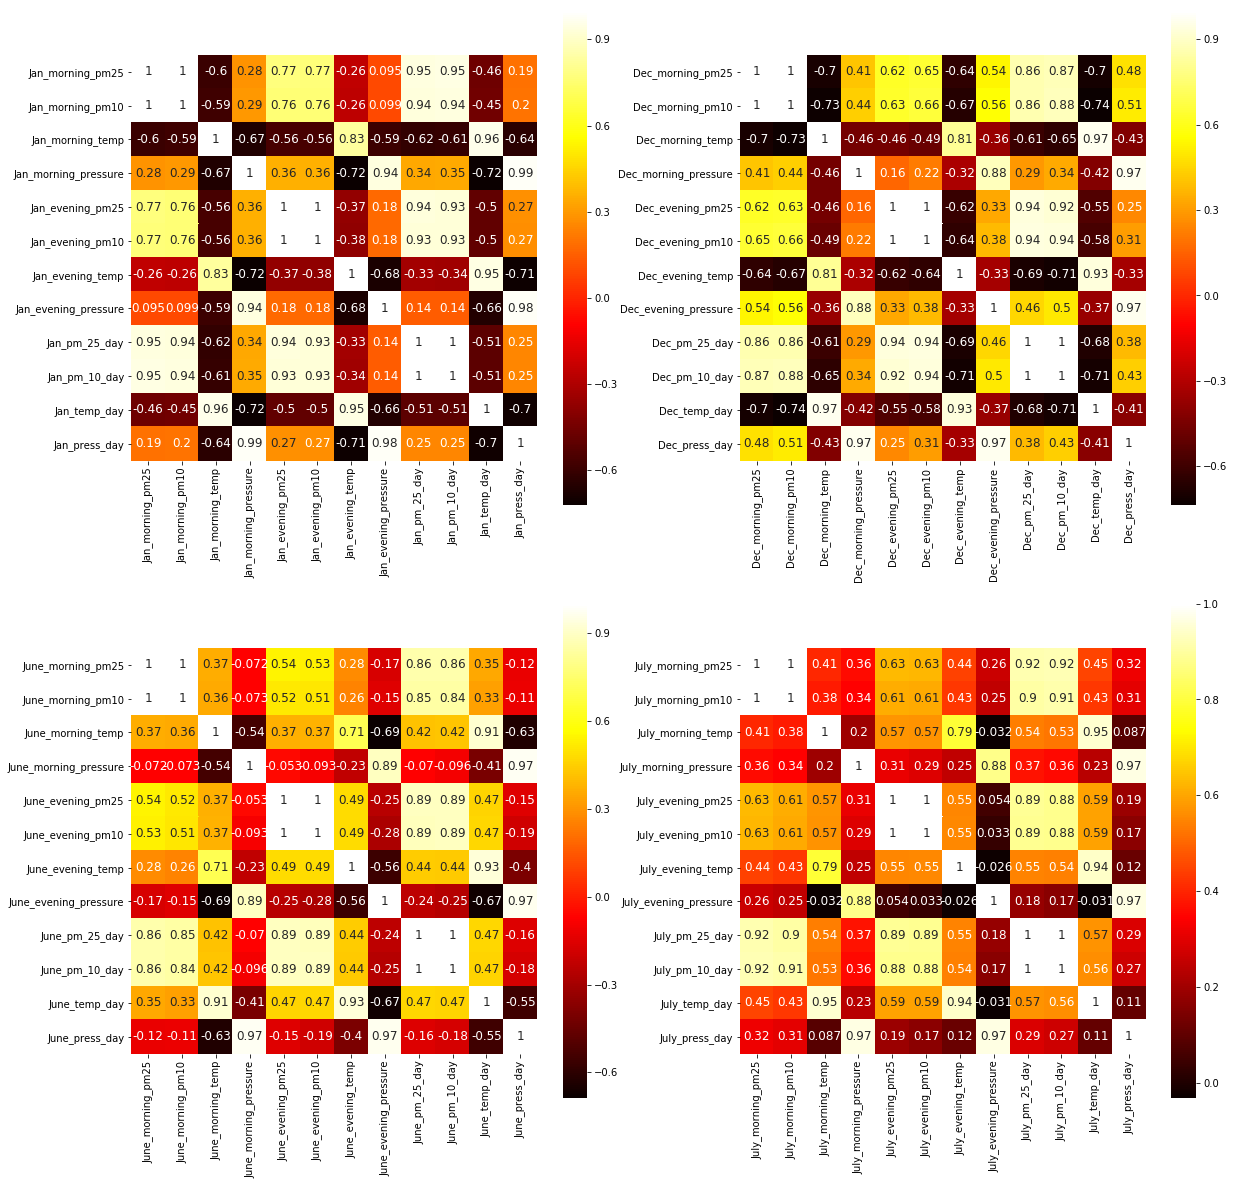

In [314]:
fig = plt.figure(figsize = (20,20)) # width x height
ax1 = fig.add_subplot(2, 2, 1) # row, column, position
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

cmap='hot'
# We use ax parameter to tell seaborn which subplot to use for this plot
sns.heatmap(data=jan.corr(), ax=ax1,  cmap = cmap, square=True,  annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=dec.corr(), ax=ax2, cmap = cmap, square=True,  annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=june.corr(), ax=ax3, cmap = cmap, square=True, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=july.corr(), ax=ax4, cmap = cmap, square=True, annot=True, annot_kws={'fontsize': 12})
plt.show()

### 1. Strong correlation between pm10 and pm2.5
### 2. Winter time - negative strong correlation between temp and ( pm10 and pm 2.5)
### 3. Summer time - positive strong correlation between temp and ( pm10 and pm 2.5)

### Pm10 vs Pm2.5

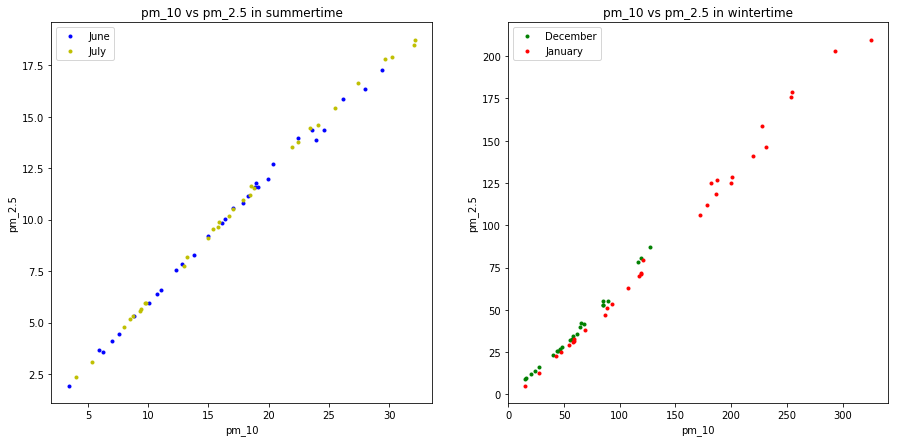

In [315]:
fig = plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
#ax1 = plt.gca()
plt.plot('June_pm_10_day', 'June_pm_25_day', 'bo', markersize=3, label='June', data=june)
plt.plot('July_pm_10_day', 'July_pm_25_day', 'yo', markersize=3, data=july, label='July')
plt.xlabel('pm_10')
plt.ylabel('pm_2.5')
plt.title('pm_10 vs pm_2.5 in summertime')
plt.legend(loc='upper left')
plt.subplot(1, 2, 2)
#ax1 = plt.gca()
plt.plot('Dec_pm_10_day', 'Dec_pm_25_day', 'go', markersize=3, label='December', data=dec)
plt.plot('Jan_pm_10_day', 'Jan_pm_25_day','ro', markersize=3, label = 'January', data=jan)
plt.xlabel('pm_10')
plt.ylabel('pm_2.5')
plt.title('pm_10 vs pm_2.5 in wintertime')
plt.legend(loc='upper left')
plt.show()

## 1. Pm2.5 and Pm10 - strong line corr. 
## 2. Much lower in summertime than in wintertime. 
## 3. Much lower in Dec than in January. Its because of lower temp in jan than in Dec (probably but who knows...)

### PM dependence on day temperature 

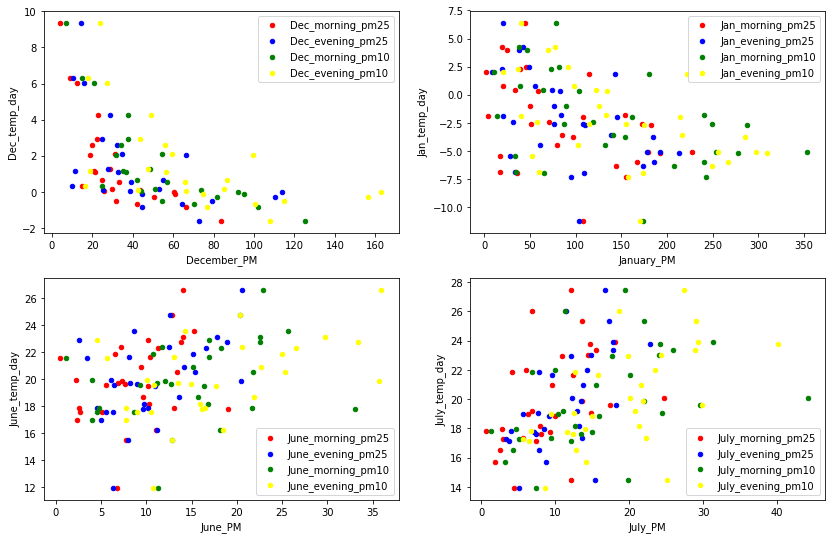

In [316]:
fig = plt.figure(figsize = (14, 9))

plt.subplot(2, 2, 1)
ax1 = plt.gca()
dec.plot(kind='scatter', x='Dec_morning_pm25', y='Dec_temp_day', color='red', ax=ax1, label='Dec_morning_pm25')
dec.plot(kind='scatter', x='Dec_evening_pm25', y='Dec_temp_day', color='blue', ax=ax1, label='Dec_evening_pm25')
dec.plot(kind='scatter', x='Dec_morning_pm10', y='Dec_temp_day', color='green', ax=ax1, label='Dec_morning_pm10')
dec.plot(kind='scatter', x='Dec_evening_pm10', y='Dec_temp_day', color='yellow', ax=ax1, label='Dec_evening_pm10')
plt.xlabel('December_PM')

plt.subplot(2, 2, 2)
ax2 = plt.gca()
jan.plot(kind='scatter', x='Jan_morning_pm25', y='Jan_temp_day', color='red', ax=ax2, label='Jan_morning_pm25')
jan.plot(kind='scatter', x='Jan_evening_pm25', y='Jan_temp_day', color='blue', ax=ax2, label='Jan_evening_pm25')
jan.plot(kind='scatter', x='Jan_morning_pm10', y='Jan_temp_day', color='green', ax=ax2, label='Jan_morning_pm10')
jan.plot(kind='scatter', x='Jan_evening_pm10', y='Jan_temp_day', color='yellow', ax=ax2, label='Jan_evening_pm10')
plt.xlabel('January_PM')

plt.subplot(2, 2, 3)
ax3 = plt.gca()
june.plot(kind='scatter', x='June_morning_pm25', y='June_temp_day', color='red', ax=ax3, label='June_morning_pm25')
june.plot(kind='scatter', x='June_evening_pm25', y='June_temp_day', color='blue', ax=ax3, label='June_evening_pm25')
june.plot(kind='scatter', x='June_morning_pm10', y='June_temp_day', color='green', ax=ax3, label='June_morning_pm10')
june.plot(kind='scatter', x='June_evening_pm10', y='June_temp_day', color='yellow', ax=ax3, label='June_evening_pm10')
plt.xlabel('June_PM')

plt.subplot(2, 2, 4)
ax4 = plt.gca()
july.plot(kind='scatter', x='July_morning_pm25', y='July_temp_day', color='red', ax=ax4, label='July_morning_pm25')
july.plot(kind='scatter', x='July_evening_pm25', y='July_temp_day', color='blue', ax=ax4, label='July_evening_pm25')
july.plot(kind='scatter', x='July_morning_pm10', y='July_temp_day', color='green', ax=ax4, label='July_morning_pm10')
july.plot(kind='scatter', x='July_evening_pm10', y='July_temp_day', color='yellow', ax=ax4, label='July_evening_pm10')
plt.xlabel('July_PM')
plt.show()

plt.show()

### As we can see correlation for Dec is strong between pm 2.5 morning, evening, pm 10 morning, evening and dat temp (coor coef = -0.7 for morning and -0,55 for evening). We can see the trend.
### For january, June, July, corr coef is lower for evening and morning than for avg for all day, so its better to do graphs for day pm (not evening, morning).

## Pm10 and pm 2.5 for particular months

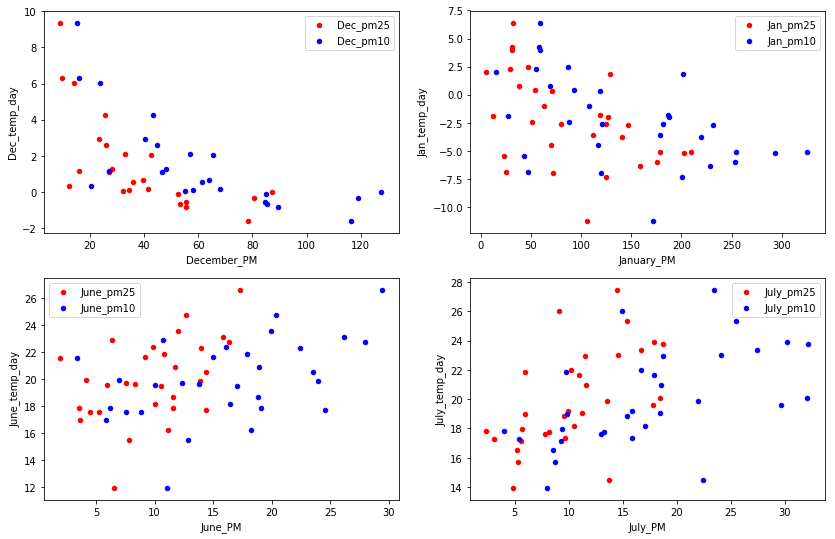

In [317]:
fig = plt.figure(figsize = (14, 9))

plt.subplot(2, 2, 1)
ax8 = plt.gca()
dec.plot(kind='scatter', x='Dec_pm_25_day', y='Dec_temp_day', color='red', ax=ax8, label='Dec_pm25')
dec.plot(kind='scatter', x='Dec_pm_10_day', y='Dec_temp_day', color='blue', ax=ax8, label='Dec_pm10')
plt.xlabel('December_PM')

plt.subplot(2, 2, 2)
ax5 = plt.gca()
jan.plot(kind='scatter', x='Jan_pm_25_day', y='Jan_temp_day', color='red', ax=ax5, label='Jan_pm25')
jan.plot(kind='scatter', x='Jan_pm_10_day', y='Jan_temp_day', color='blue', ax=ax5, label='Jan_pm10')
plt.xlabel('January_PM')

plt.subplot(2, 2, 3)
ax6 = plt.gca()
june.plot(kind='scatter', x='June_pm_25_day', y='June_temp_day', color='red', ax=ax6, label='June_pm25')
june.plot(kind='scatter', x='June_pm_10_day', y='June_temp_day', color='blue', ax=ax6, label='June_pm10')
plt.xlabel('June_PM')

plt.subplot(2, 2, 4)
ax7 = plt.gca()
july.plot(kind='scatter', x='July_pm_25_day', y='July_temp_day', color='red', ax=ax7, label='July_pm25')
july.plot(kind='scatter', x='July_pm_10_day', y='July_temp_day', color='blue', ax=ax7, label='July_pm10')
plt.xlabel('July_PM')

plt.show()

### Summer  - pm10 has higher values than pm 2.5 in june and july.  weak dependence on temp, but we can see the higher temp - the higher pm 10 (positive corr)
### winter - different pattern - the lower temp - the higher pm 10 and pm 2.5 values (negative corr)